In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import astropy.units as u
import matplotlib.pyplot as plt
from regions import CircleSkyRegion

from nustar_tools.nustar_tools.regions import RegionSelector as rs

%matplotlib inline

## Specify the ID and FPM

Simply specify the observation ID directory and the desired FPM, and the data files are found.
It is assumed that the FITS file containing the solar coordinates is in the `event_cl` subdirectory and ends with `_sunpos.evt`.

In [9]:
id_dir = '/home/reed/Documents/research/nustar/data/20180529/80410201001/'
fpm = 'A'

## Create the `RegionSelector` object

This object allows the user to specify a region for which lightcurve data will be made.
The `time_range` parameter can be specified to isolate a specific interval, and the `energy_range` parameter can be used to only consider specific energies.
The `b_livetime_correction` parameter specifies whether a livetime correction will be performed to the lightcurves.
The `out_dir` parameter specifies where the generated files will be saved if the `RegionSelector.save_fig` method is used.

In [10]:
selector = rs.RegionSelector(
    id_dir = id_dir,
    fpm = fpm,
    time_range = ('2018-05-29 16:15:00', '2018-05-29 16:30:00'),
    energy_range = (3, 10) * u.keV,
    b_livetime_correction = True,
    out_dir = './'
)

## Generate an overview map

This provides nice context before choosing a region. By default, a slight Gaussian blur is applied so the contours can be drawn.
The blur can be turned on or off by the `b_blur` boolean in `map_kw` and the blur size using the `blur_size` value.
The normalization scheme and colormap can be changed from the default by using the `norm` and `cmap` keywords in the `map_kw` parameter.

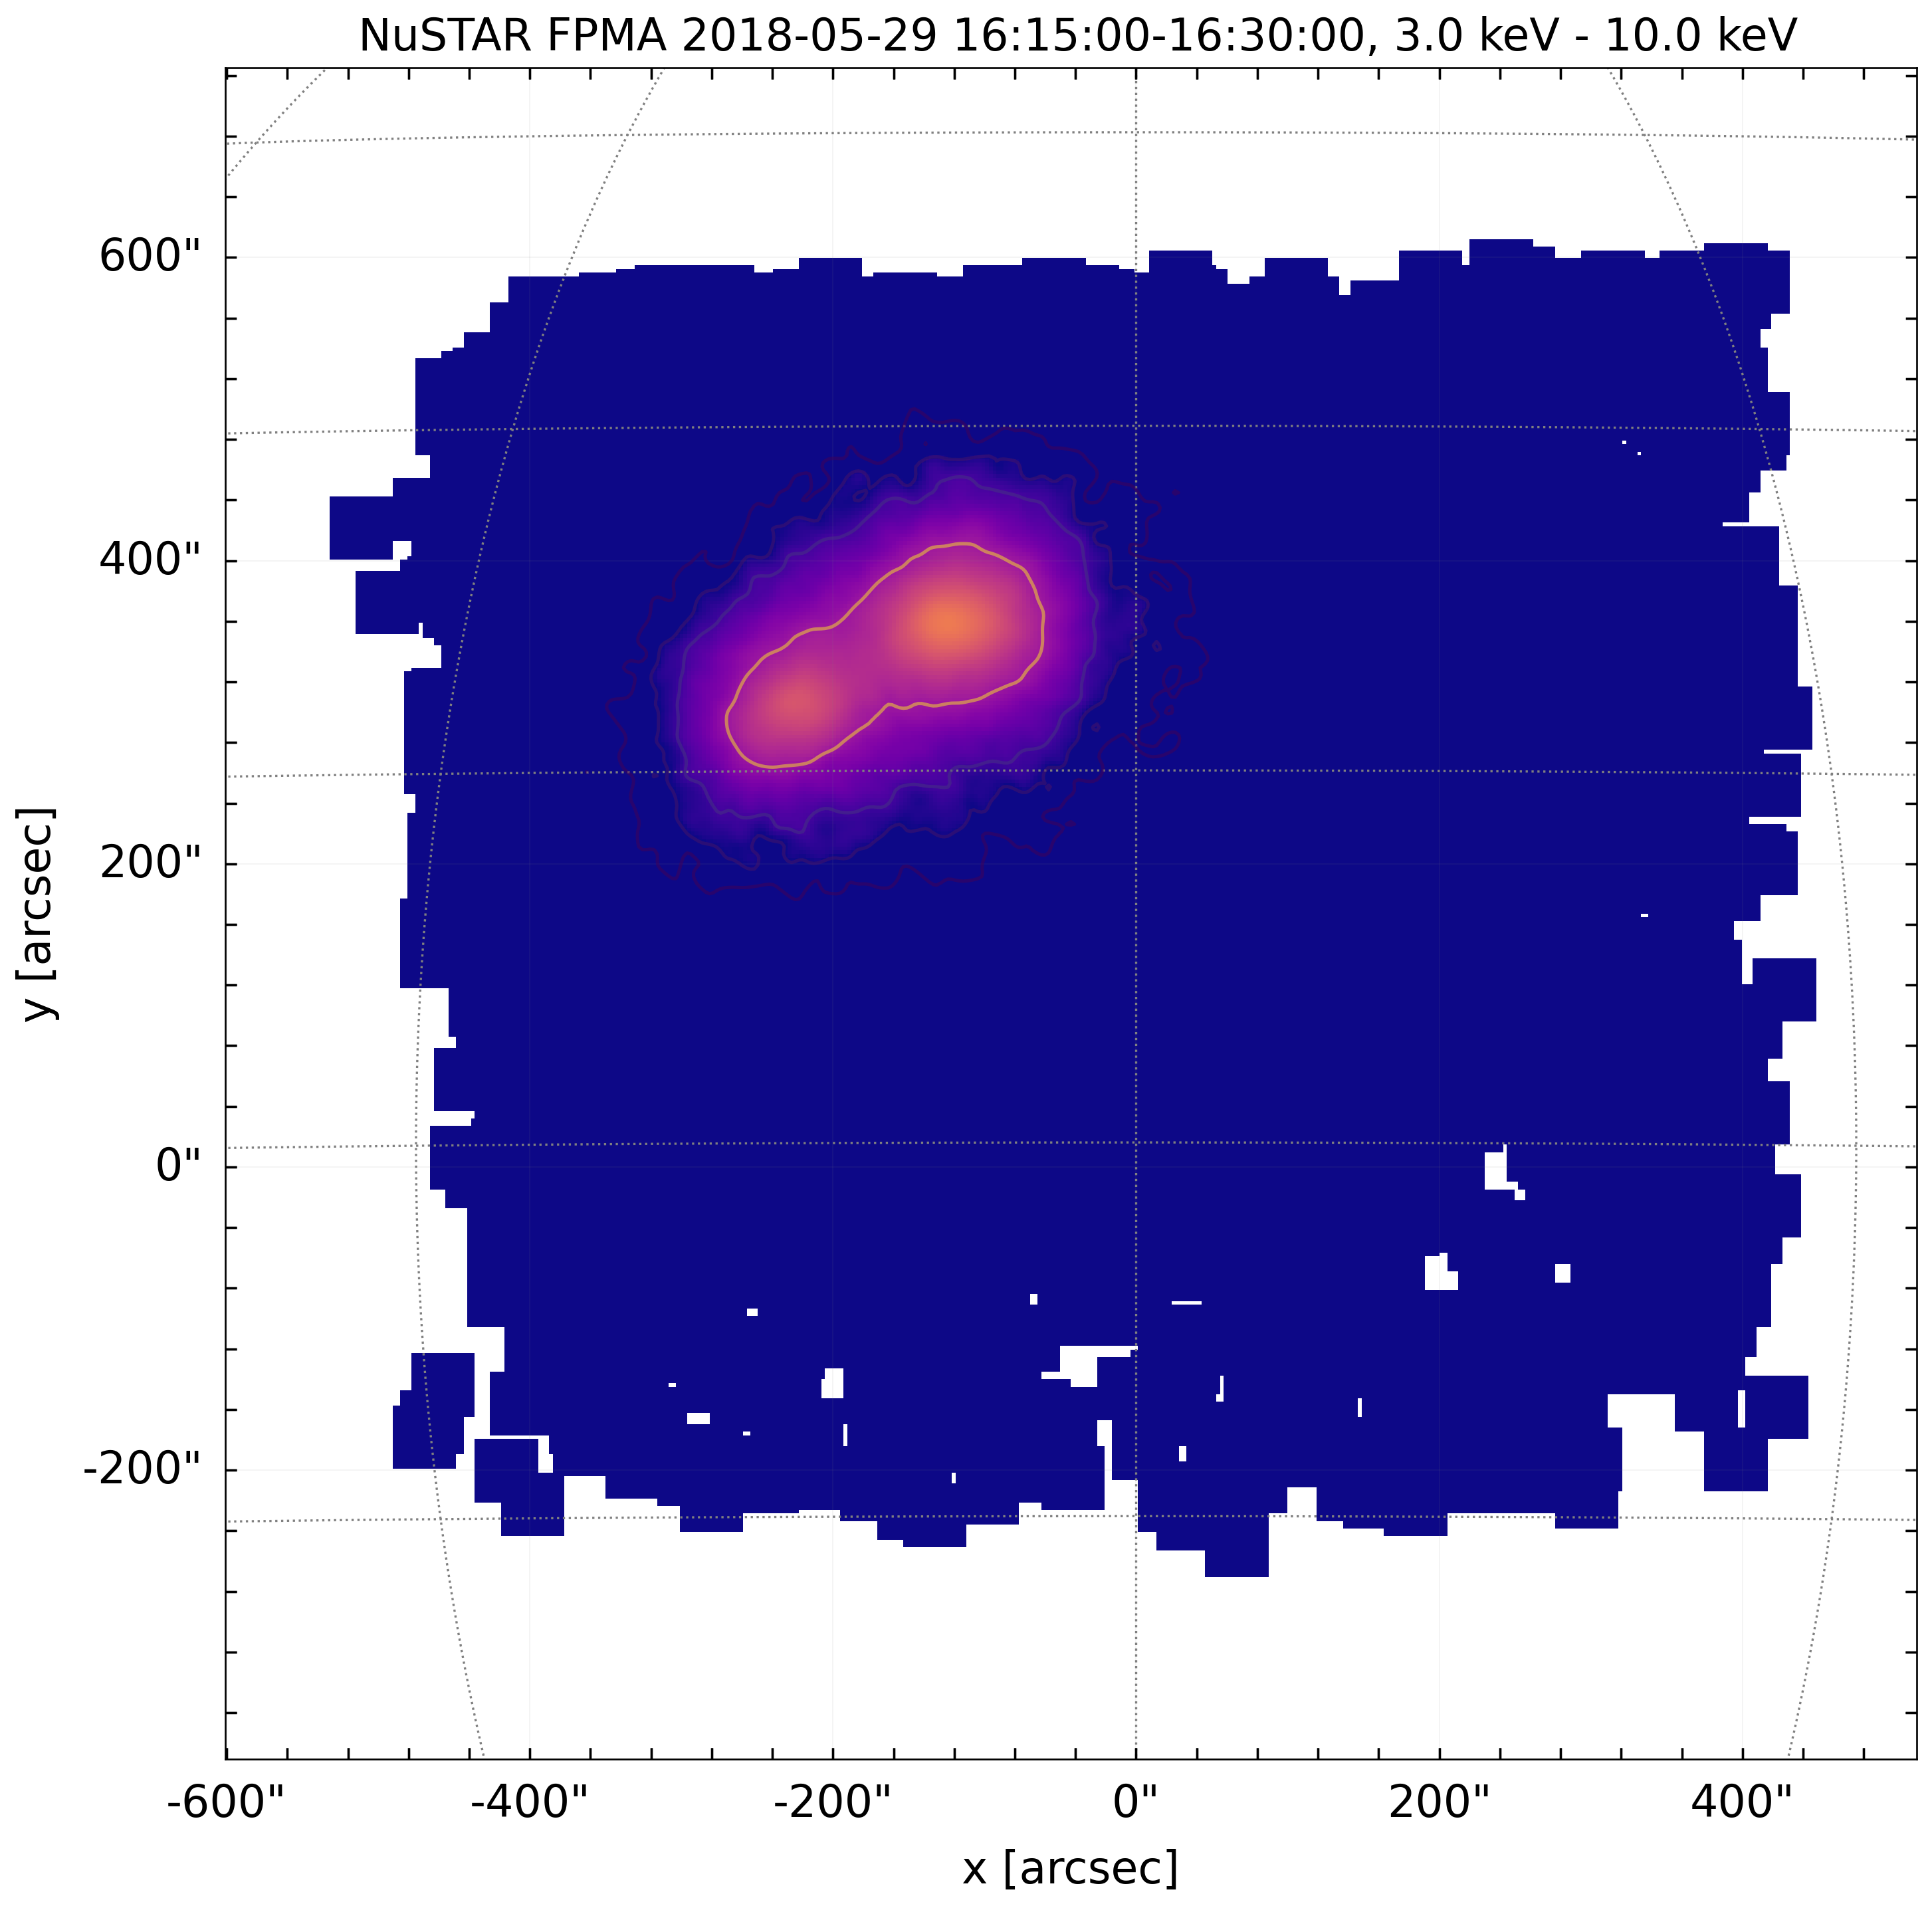

In [11]:
fig, ax, submap = selector.plot_overview_map()
# selector.save_fig('overview_map')

## Specify the region of interest

This isolates the emission only from the specified region.

In [12]:
selector.set_region(
    'region1',
    CircleSkyRegion,
    center = (-125, 350) * u.arcsec,
    radius = 100 * u.arcsec
)

## Performing deconvolution

Deconvolution can be performed on the image to reduce the spread caused by the optics.
Note that any lightcurves generated after will use the *original* data since the deconvolution is performed over the time interval specified in the `RegionSelector` rather than for each time bin.

The implemented method uses the center point of the specified region as the "source location" and the optical axis information to help perform the deconvolution.

[#################################] 100% de436.bsp


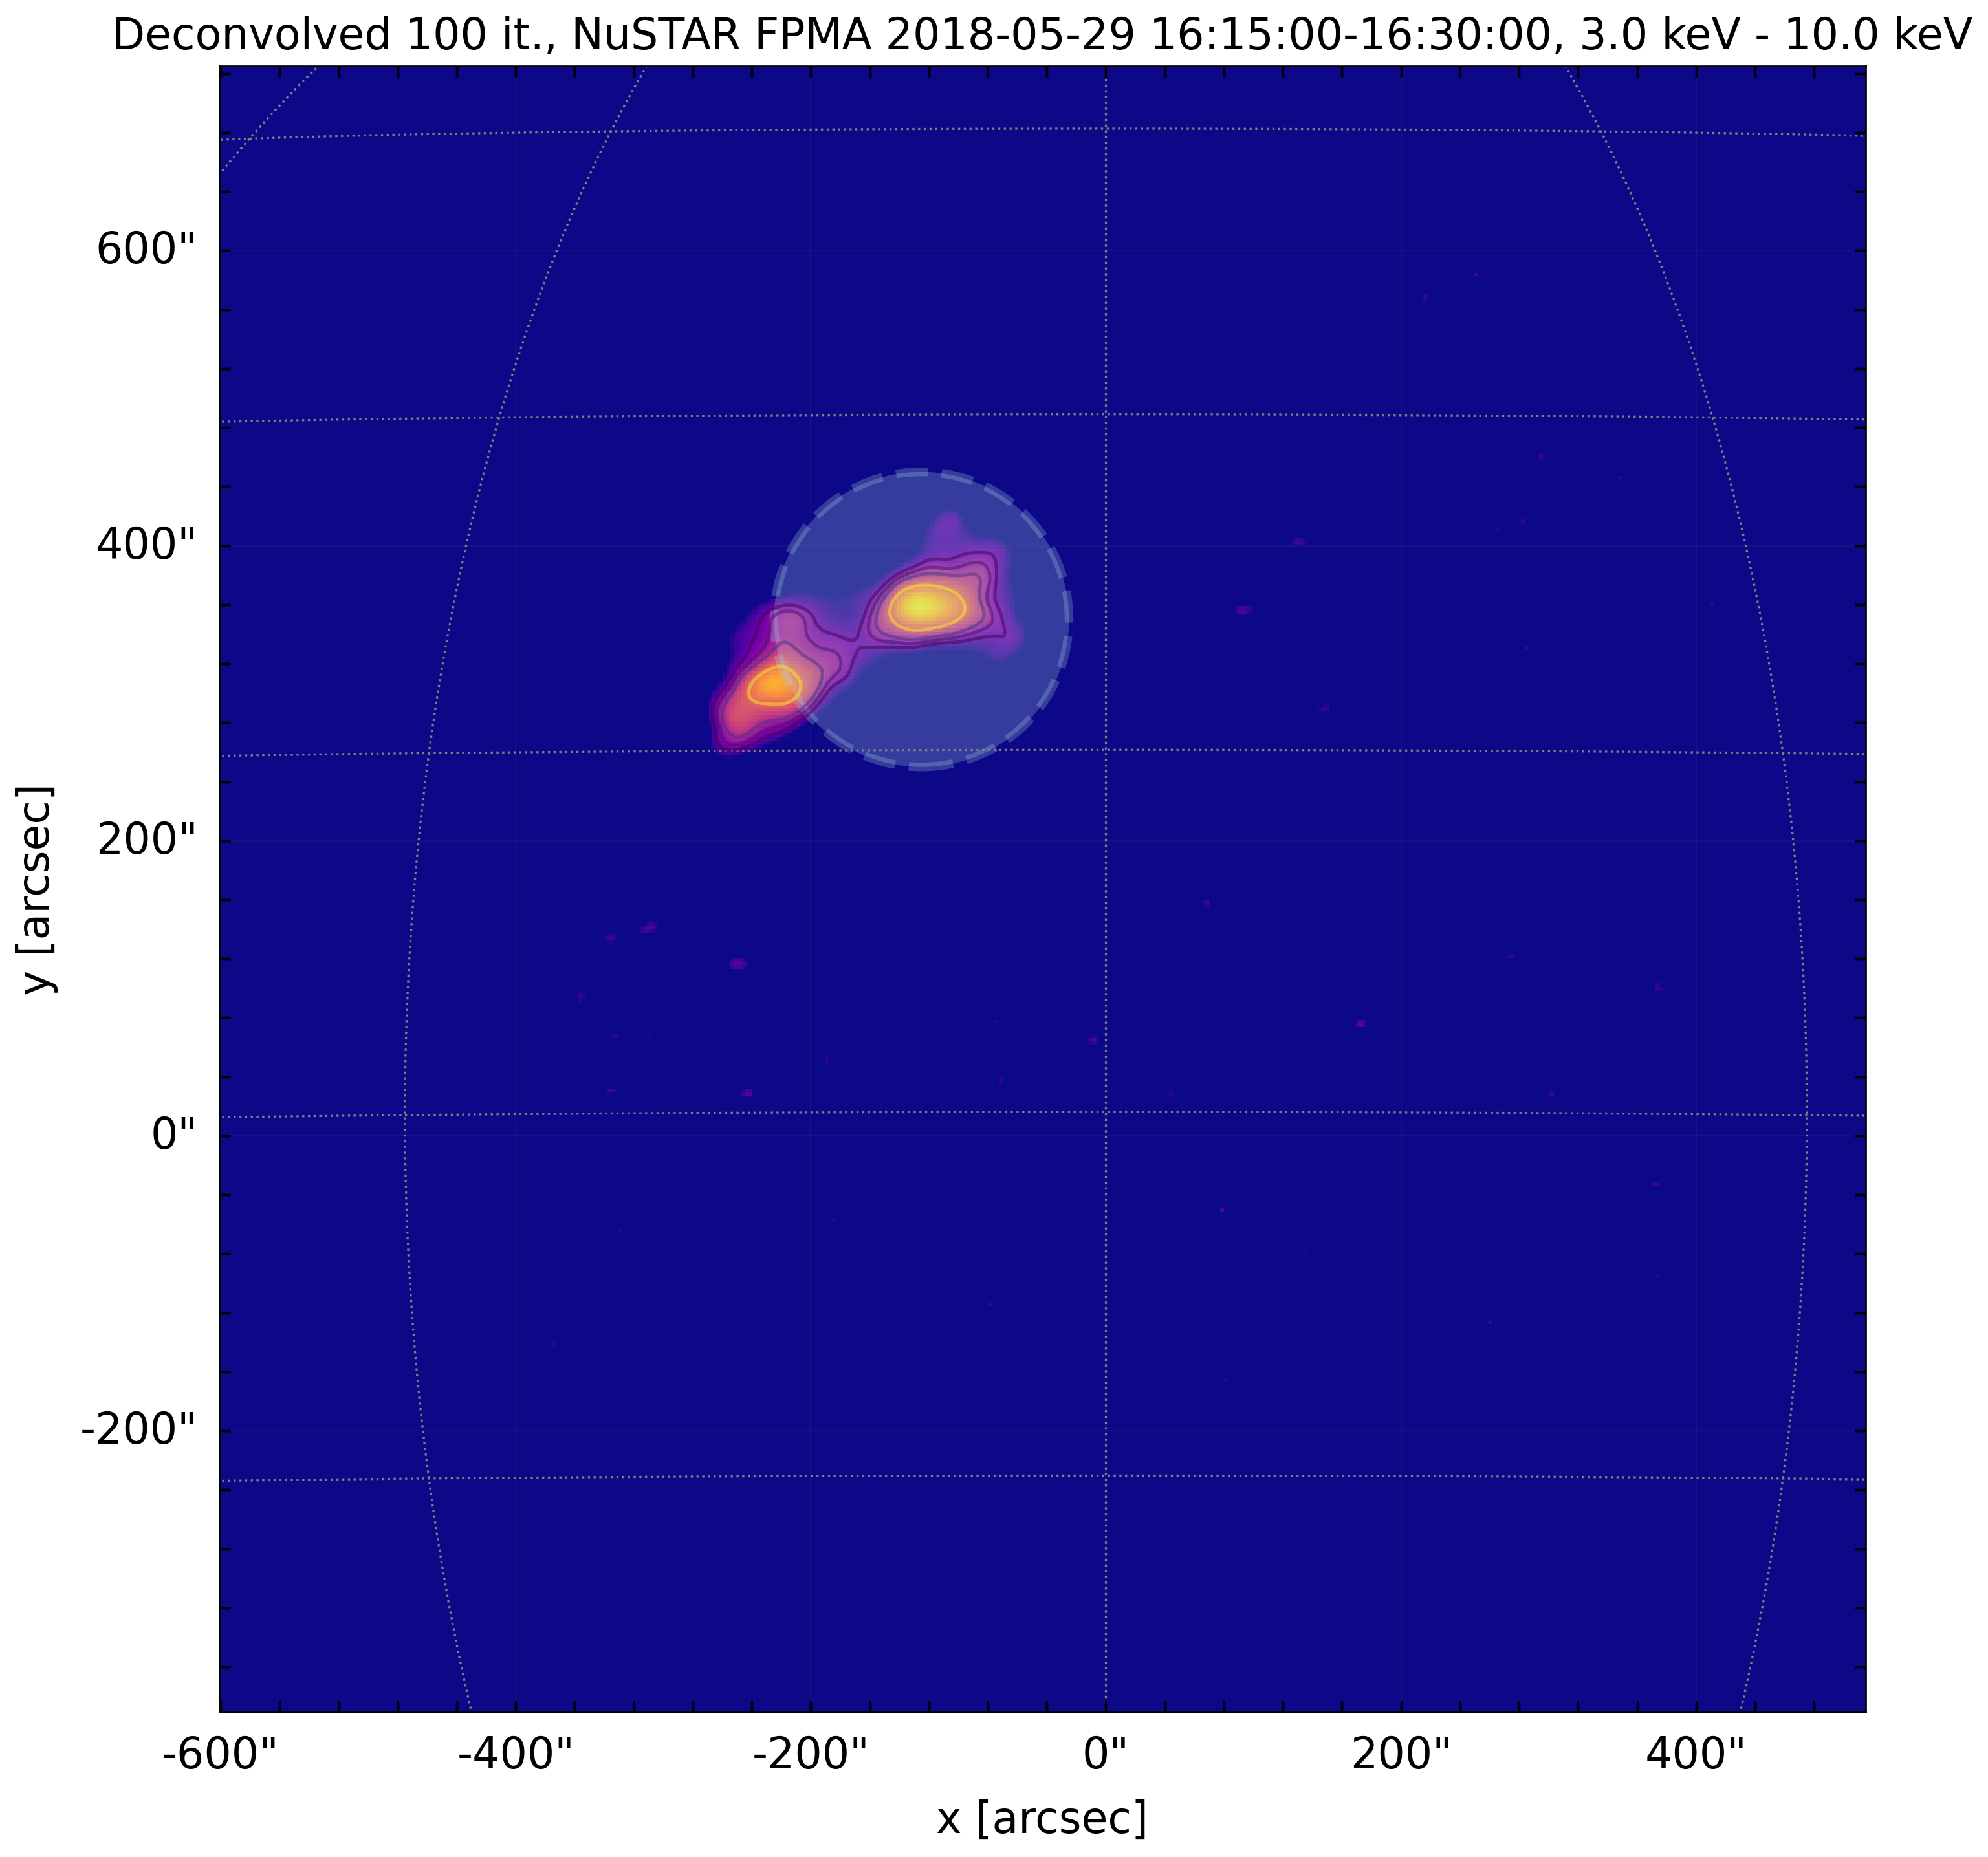

In [13]:
fig, ax, submap = selector.plot_deconvolved_map(
    iterations=100,
    region_kw=dict(alpha=0.25)
)

## Comparing before and after deconvolution

This plots the maps before and after deconvolution for comparison.
Note that in the deconvolved image the emission is brighter around the two bright points and the contours are tighter.

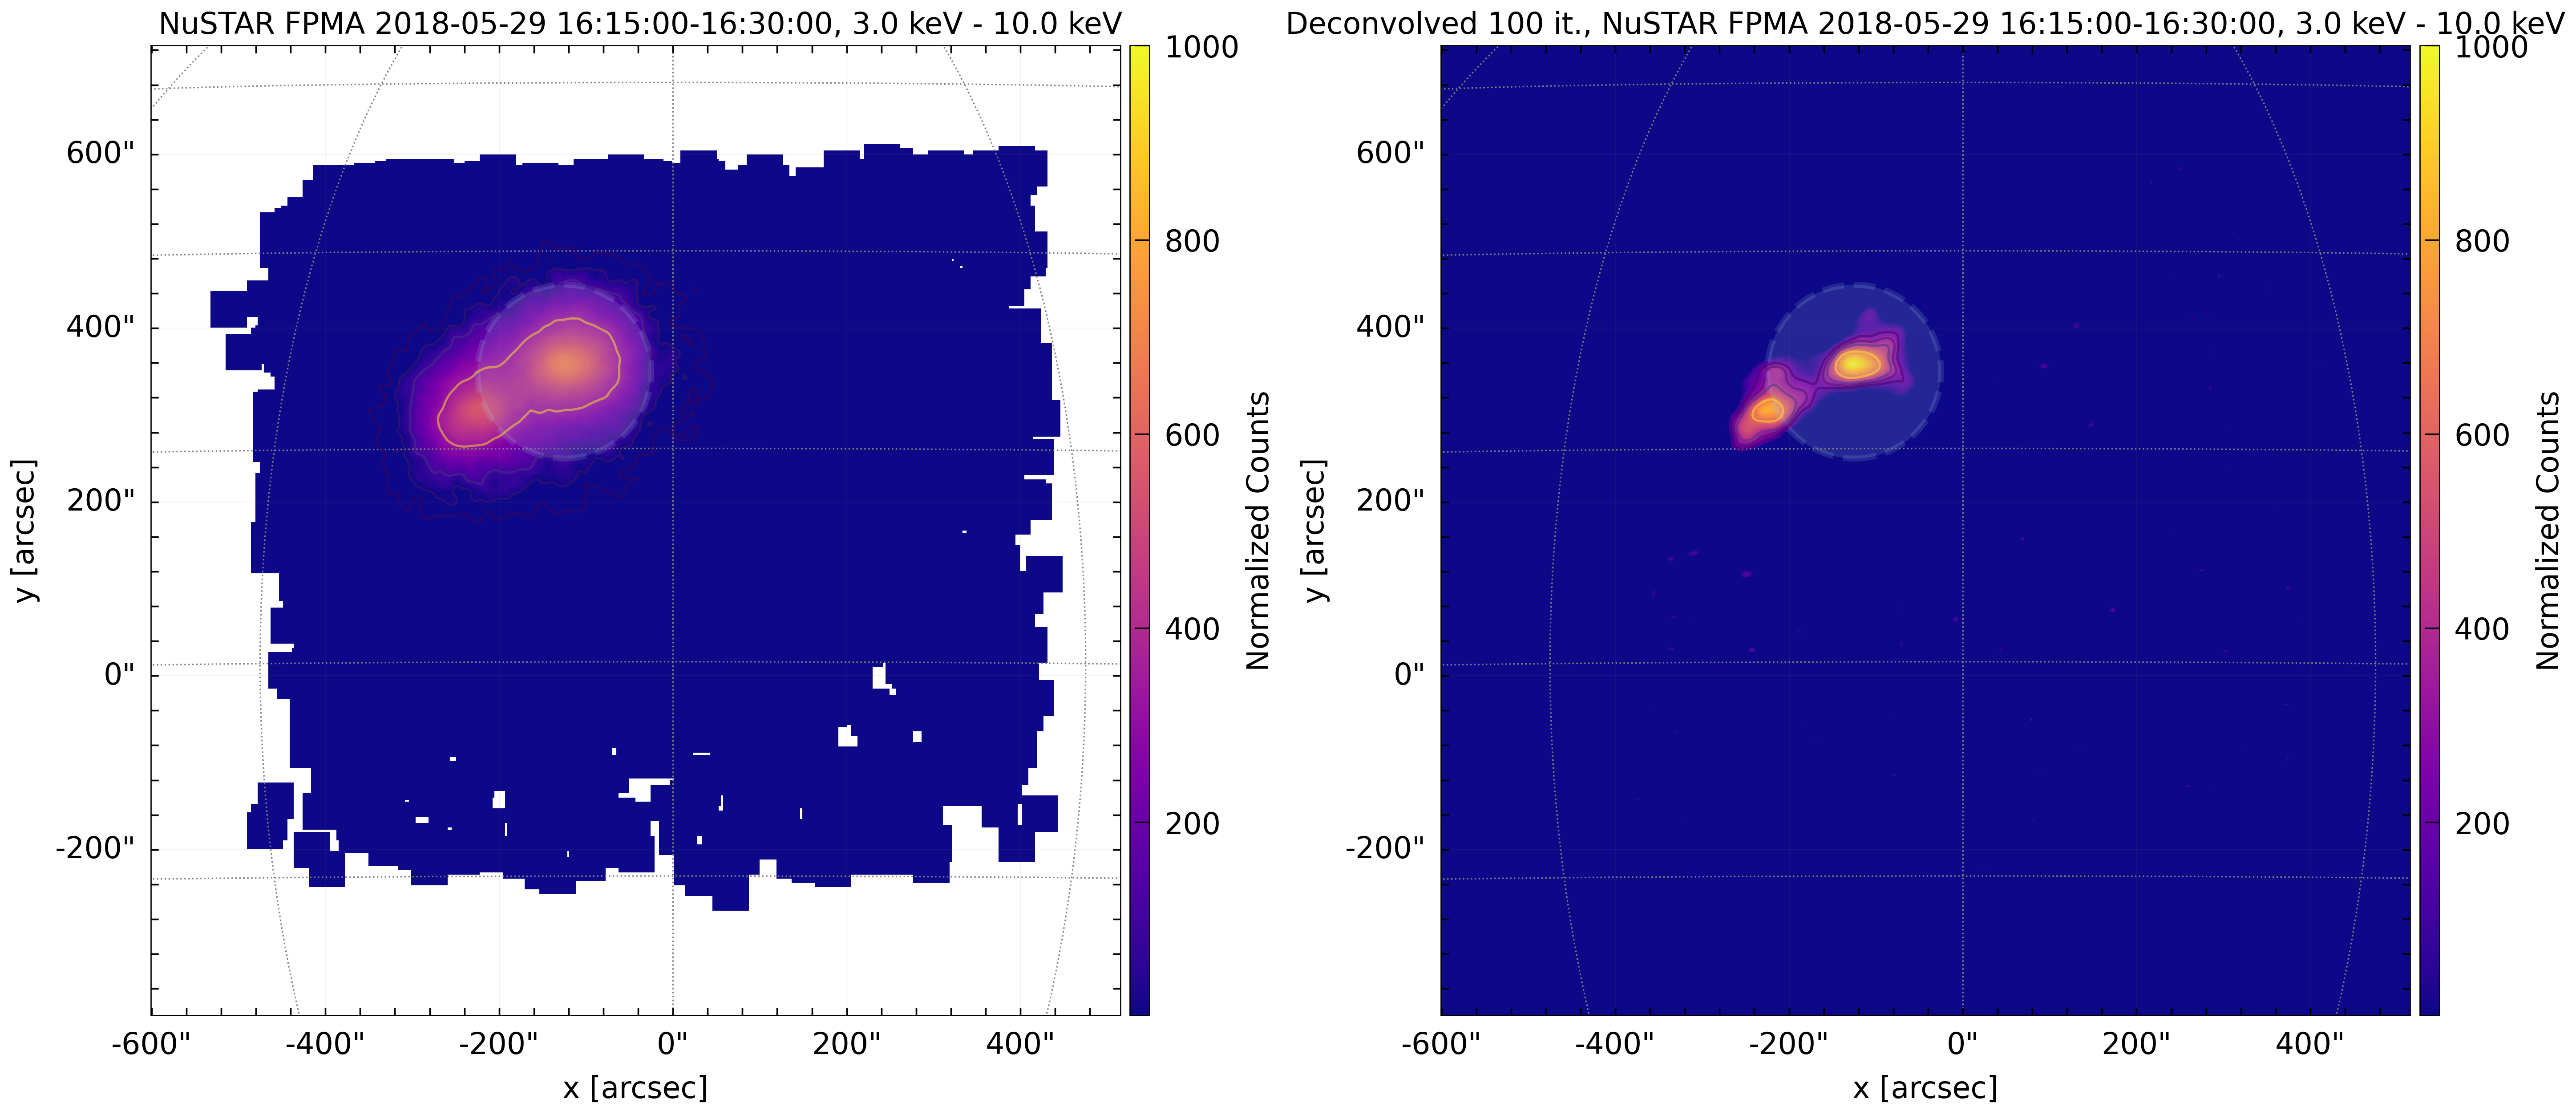

In [14]:
fig = plt.figure(figsize=(24,12), constrained_layout=True)

map_kw = dict(b_colorbar=True)
region_kw = dict(alpha=0.15)
fig, ax1, submap = selector.plot_overview_map(
    fig=fig,
    index=121,
    region_kw=region_kw,
    map_kw=map_kw
)
fig, ax2, submap_deconv = selector.plot_deconvolved_map(
    iterations=100,
    fig=fig,
    index=122,
    region_kw=region_kw,
    map_kw=map_kw
)

## Plot the lightcurve

There are various ways to visualize the data.

### Lightcurve

This plots only the lightcurve.
The errors are denoted by the shaded regions.

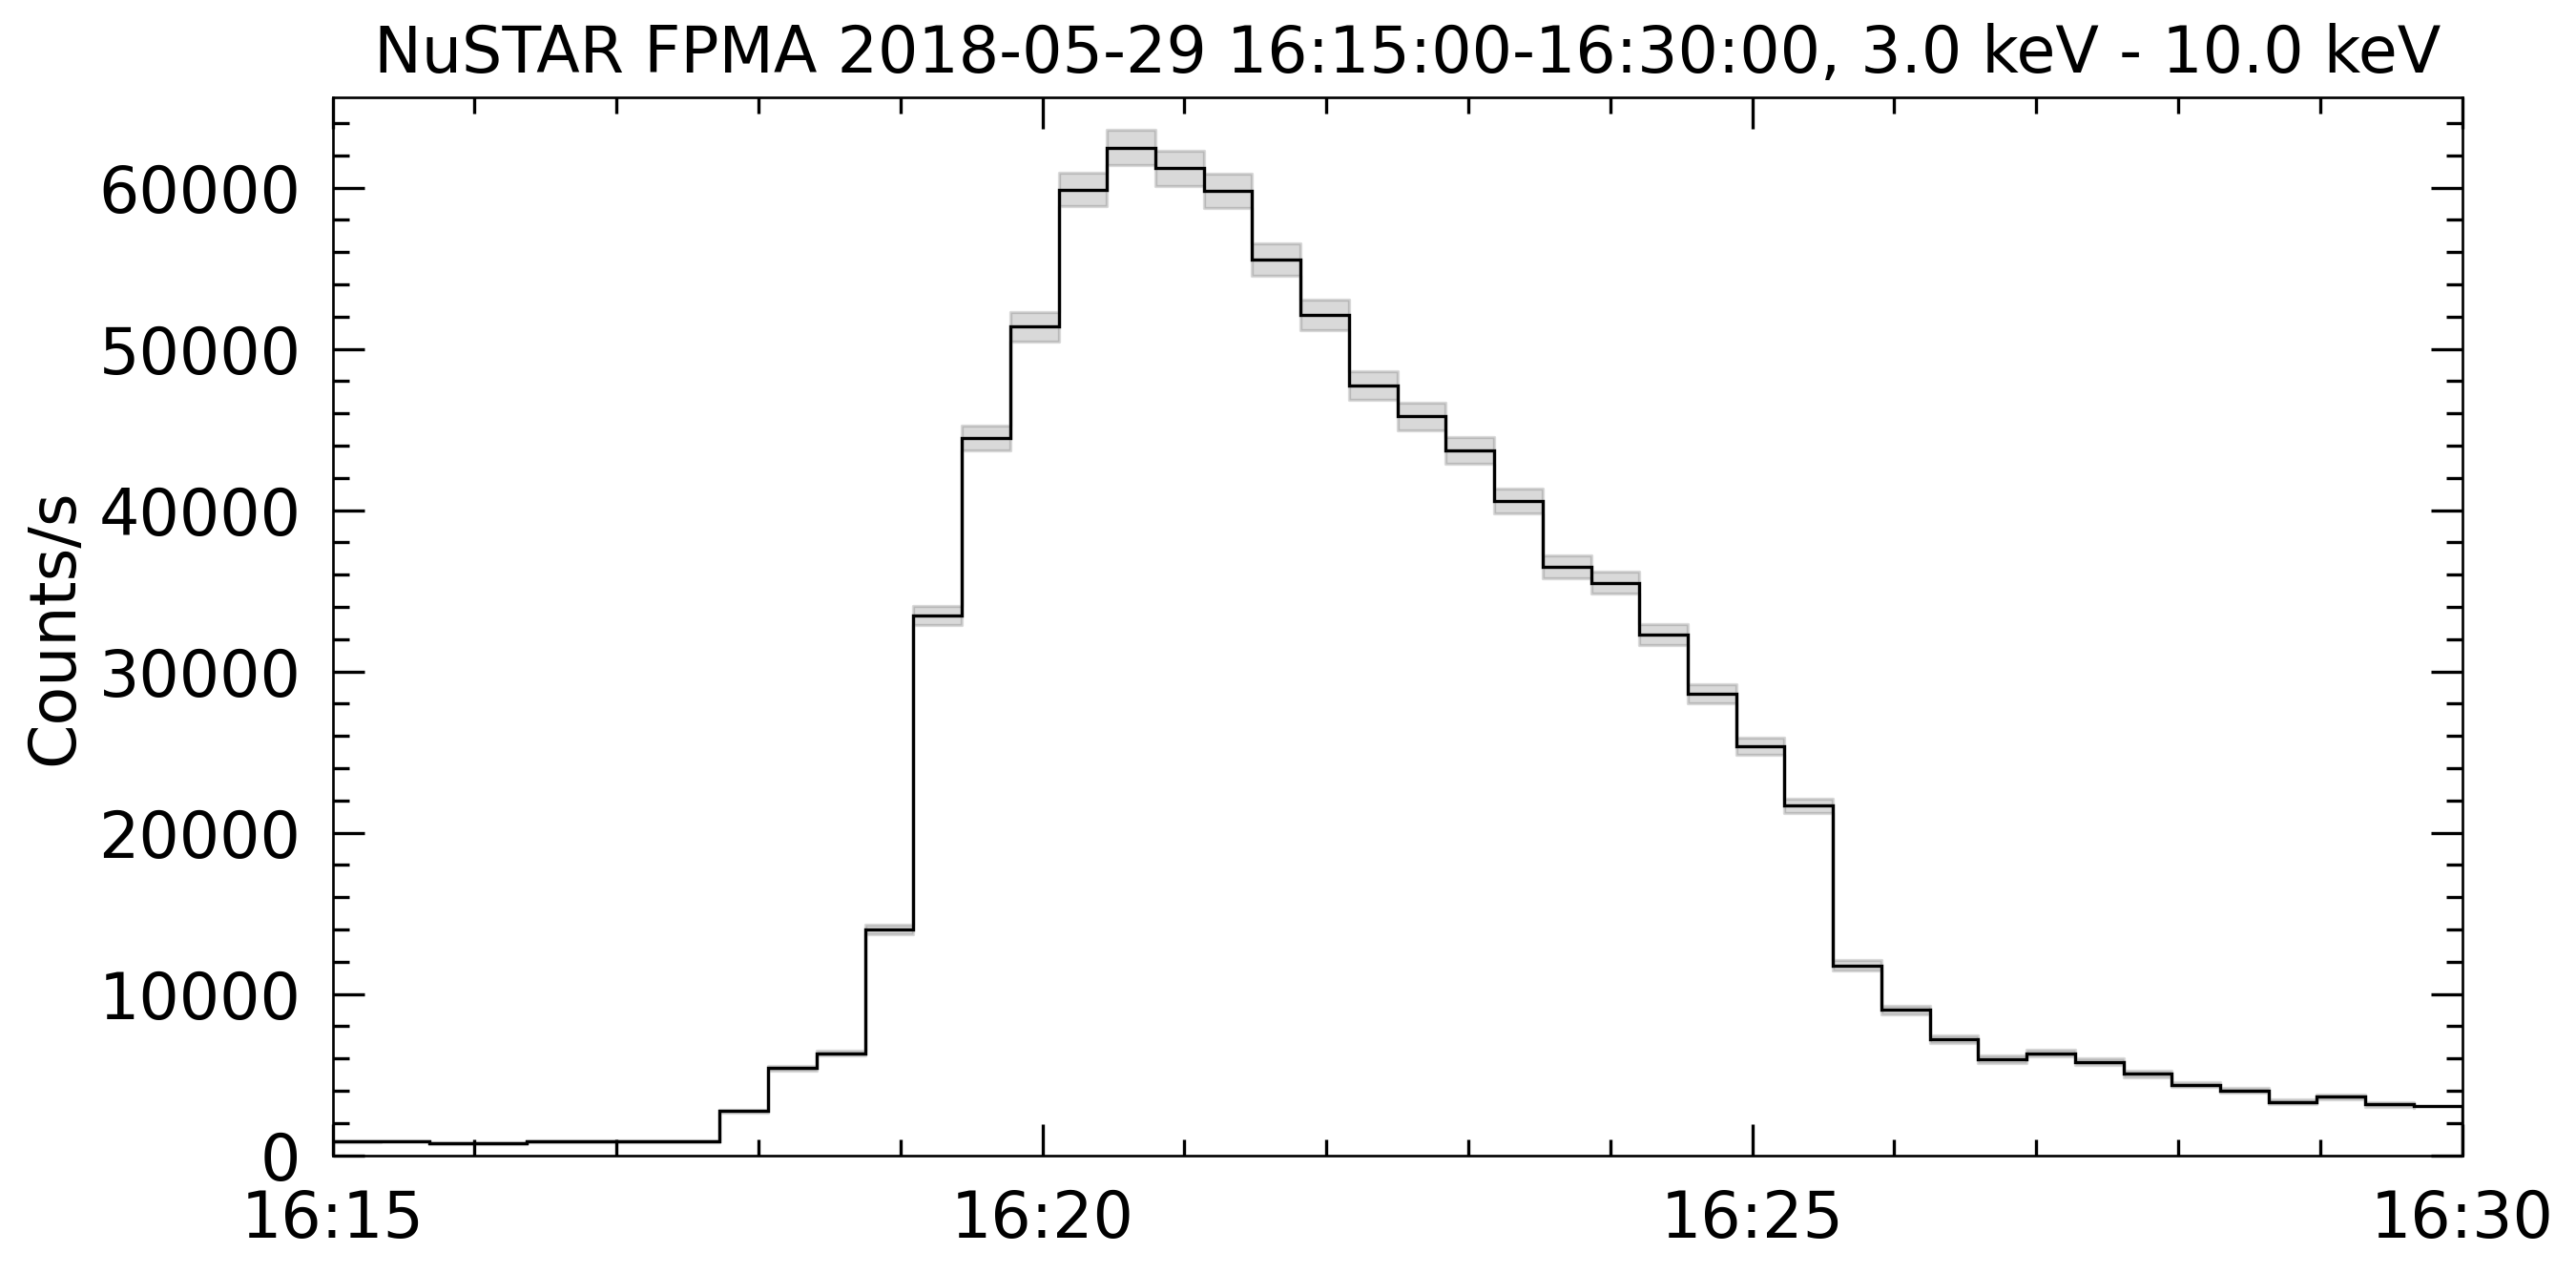

In [15]:
fig, ax = selector.plot_lightcurve(20)

### Stacked lightcurve

This plots the lightcurve broken into the specfied energy bands (energies outside the initalized energy range **can** be chosen since it uses the original FITS data to make the stacked curves).

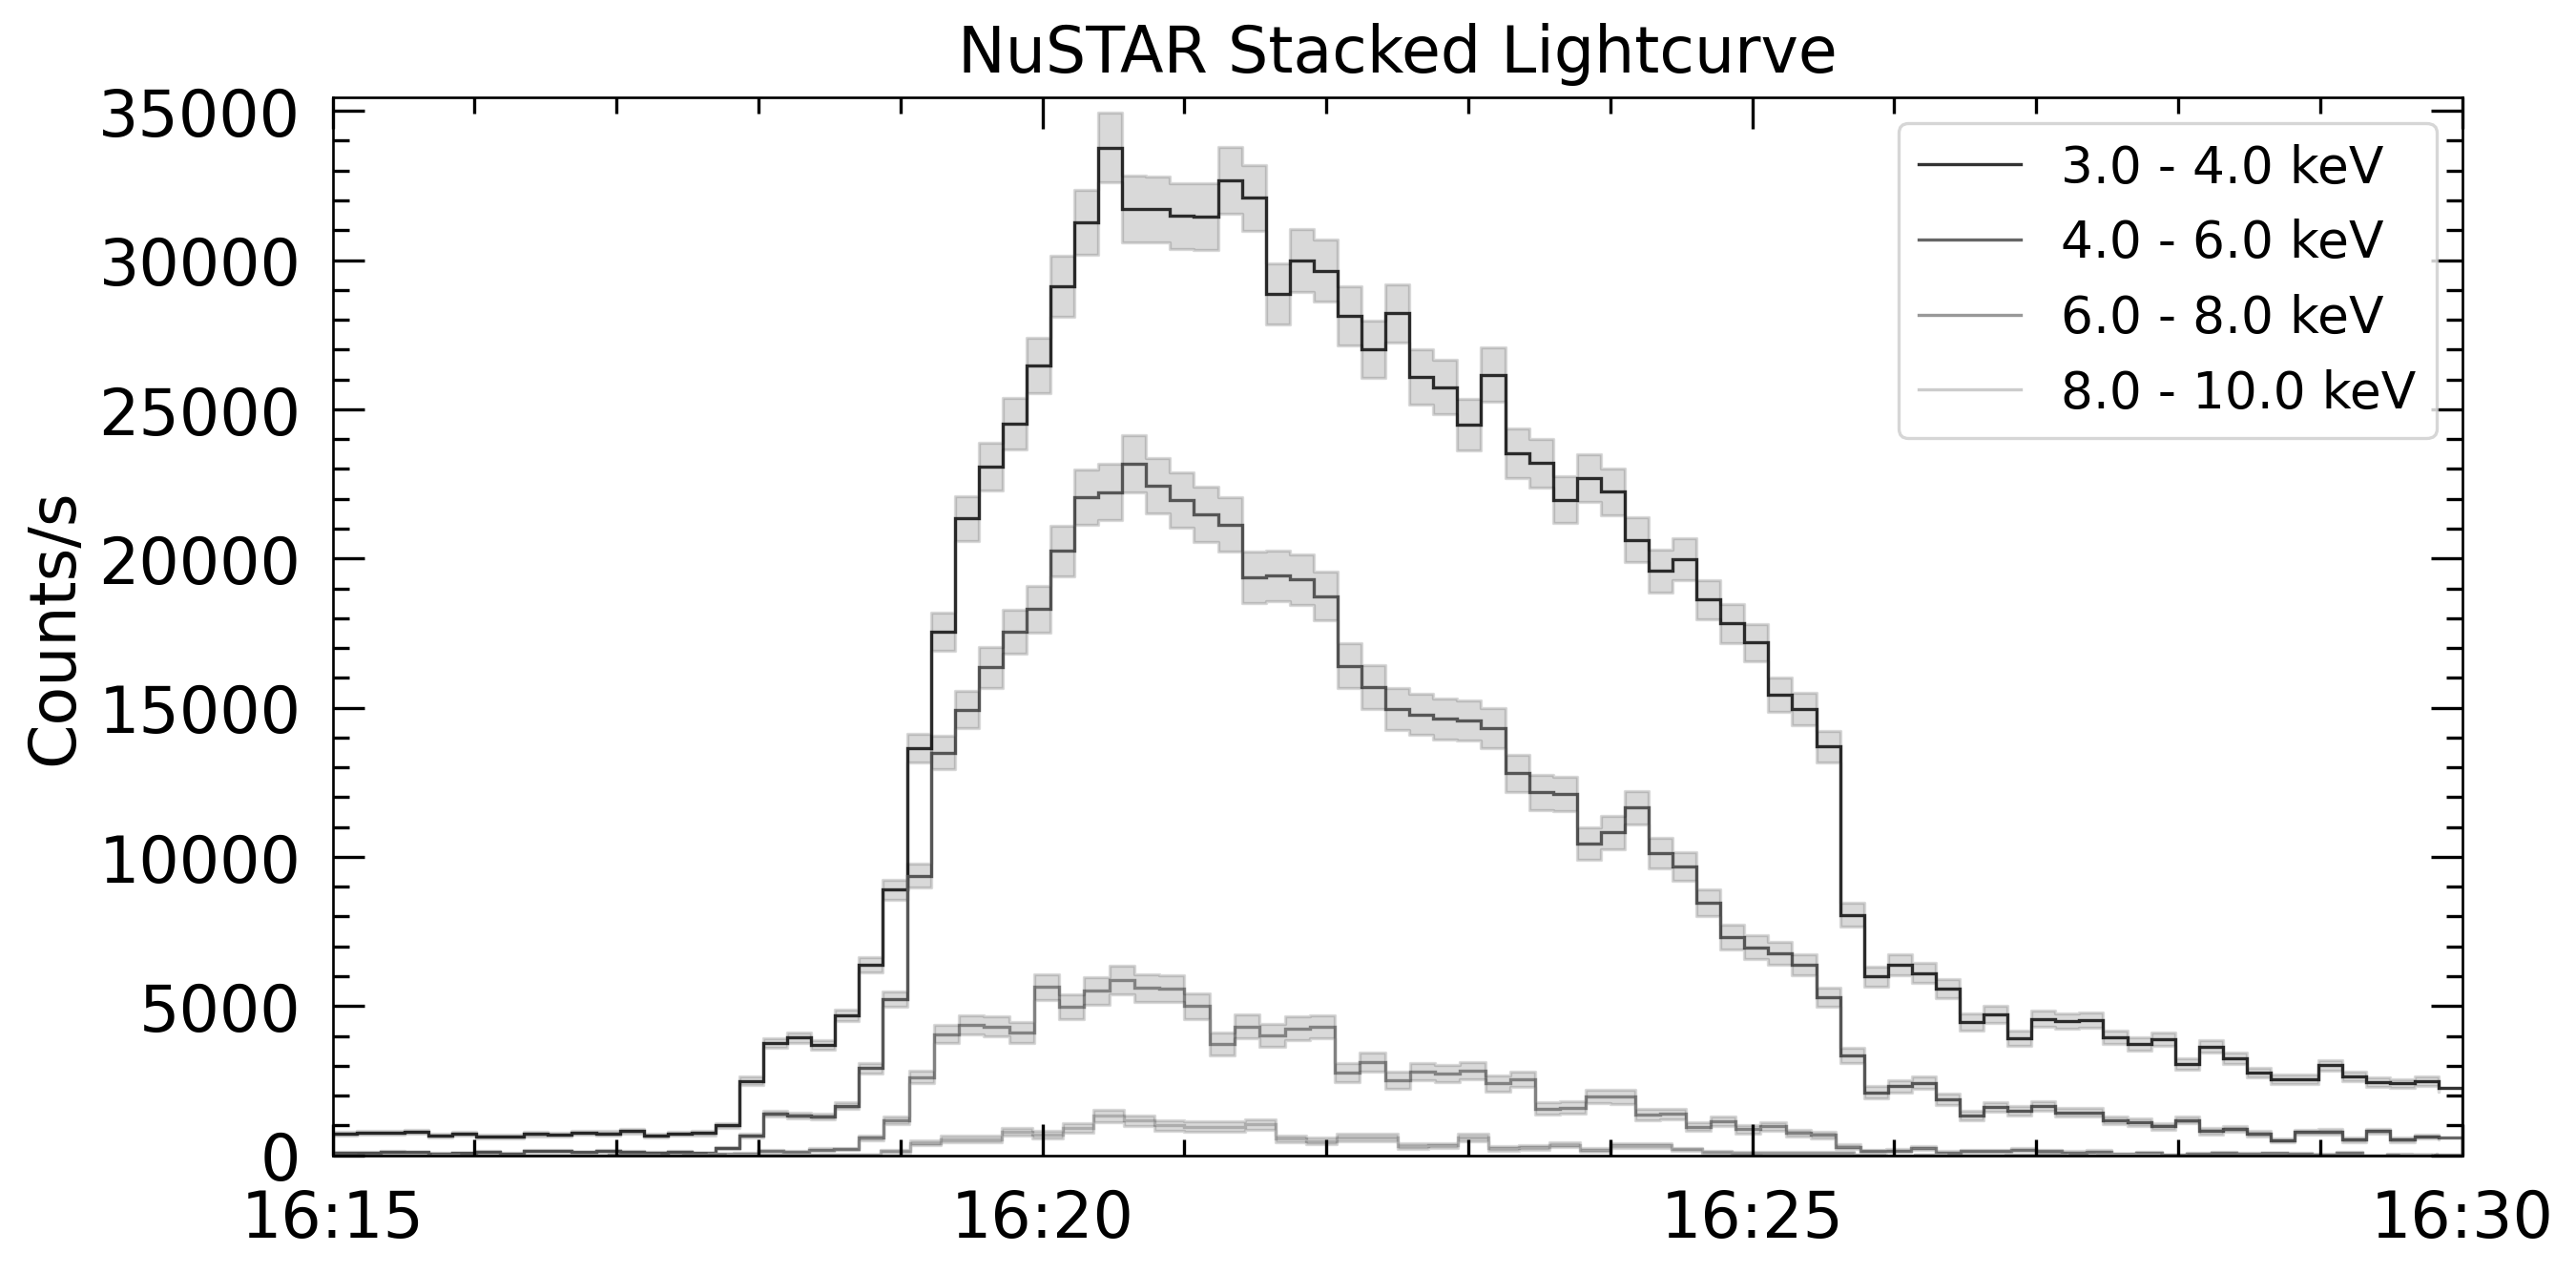

In [16]:
fig, ax = selector.plot_stacked_lightcurve(
    frame_length = 10,
    energy_ranges = (
        (3, 4) * u.keV,
        (4, 6) * u.keV,
        (6, 8) * u.keV,
        (8, 10) * u.keV,
    ),
    title='NuSTAR Stacked Lightcurve'
)

### Combined plot

The map and lightcurve are within the same figure but on separate axes.

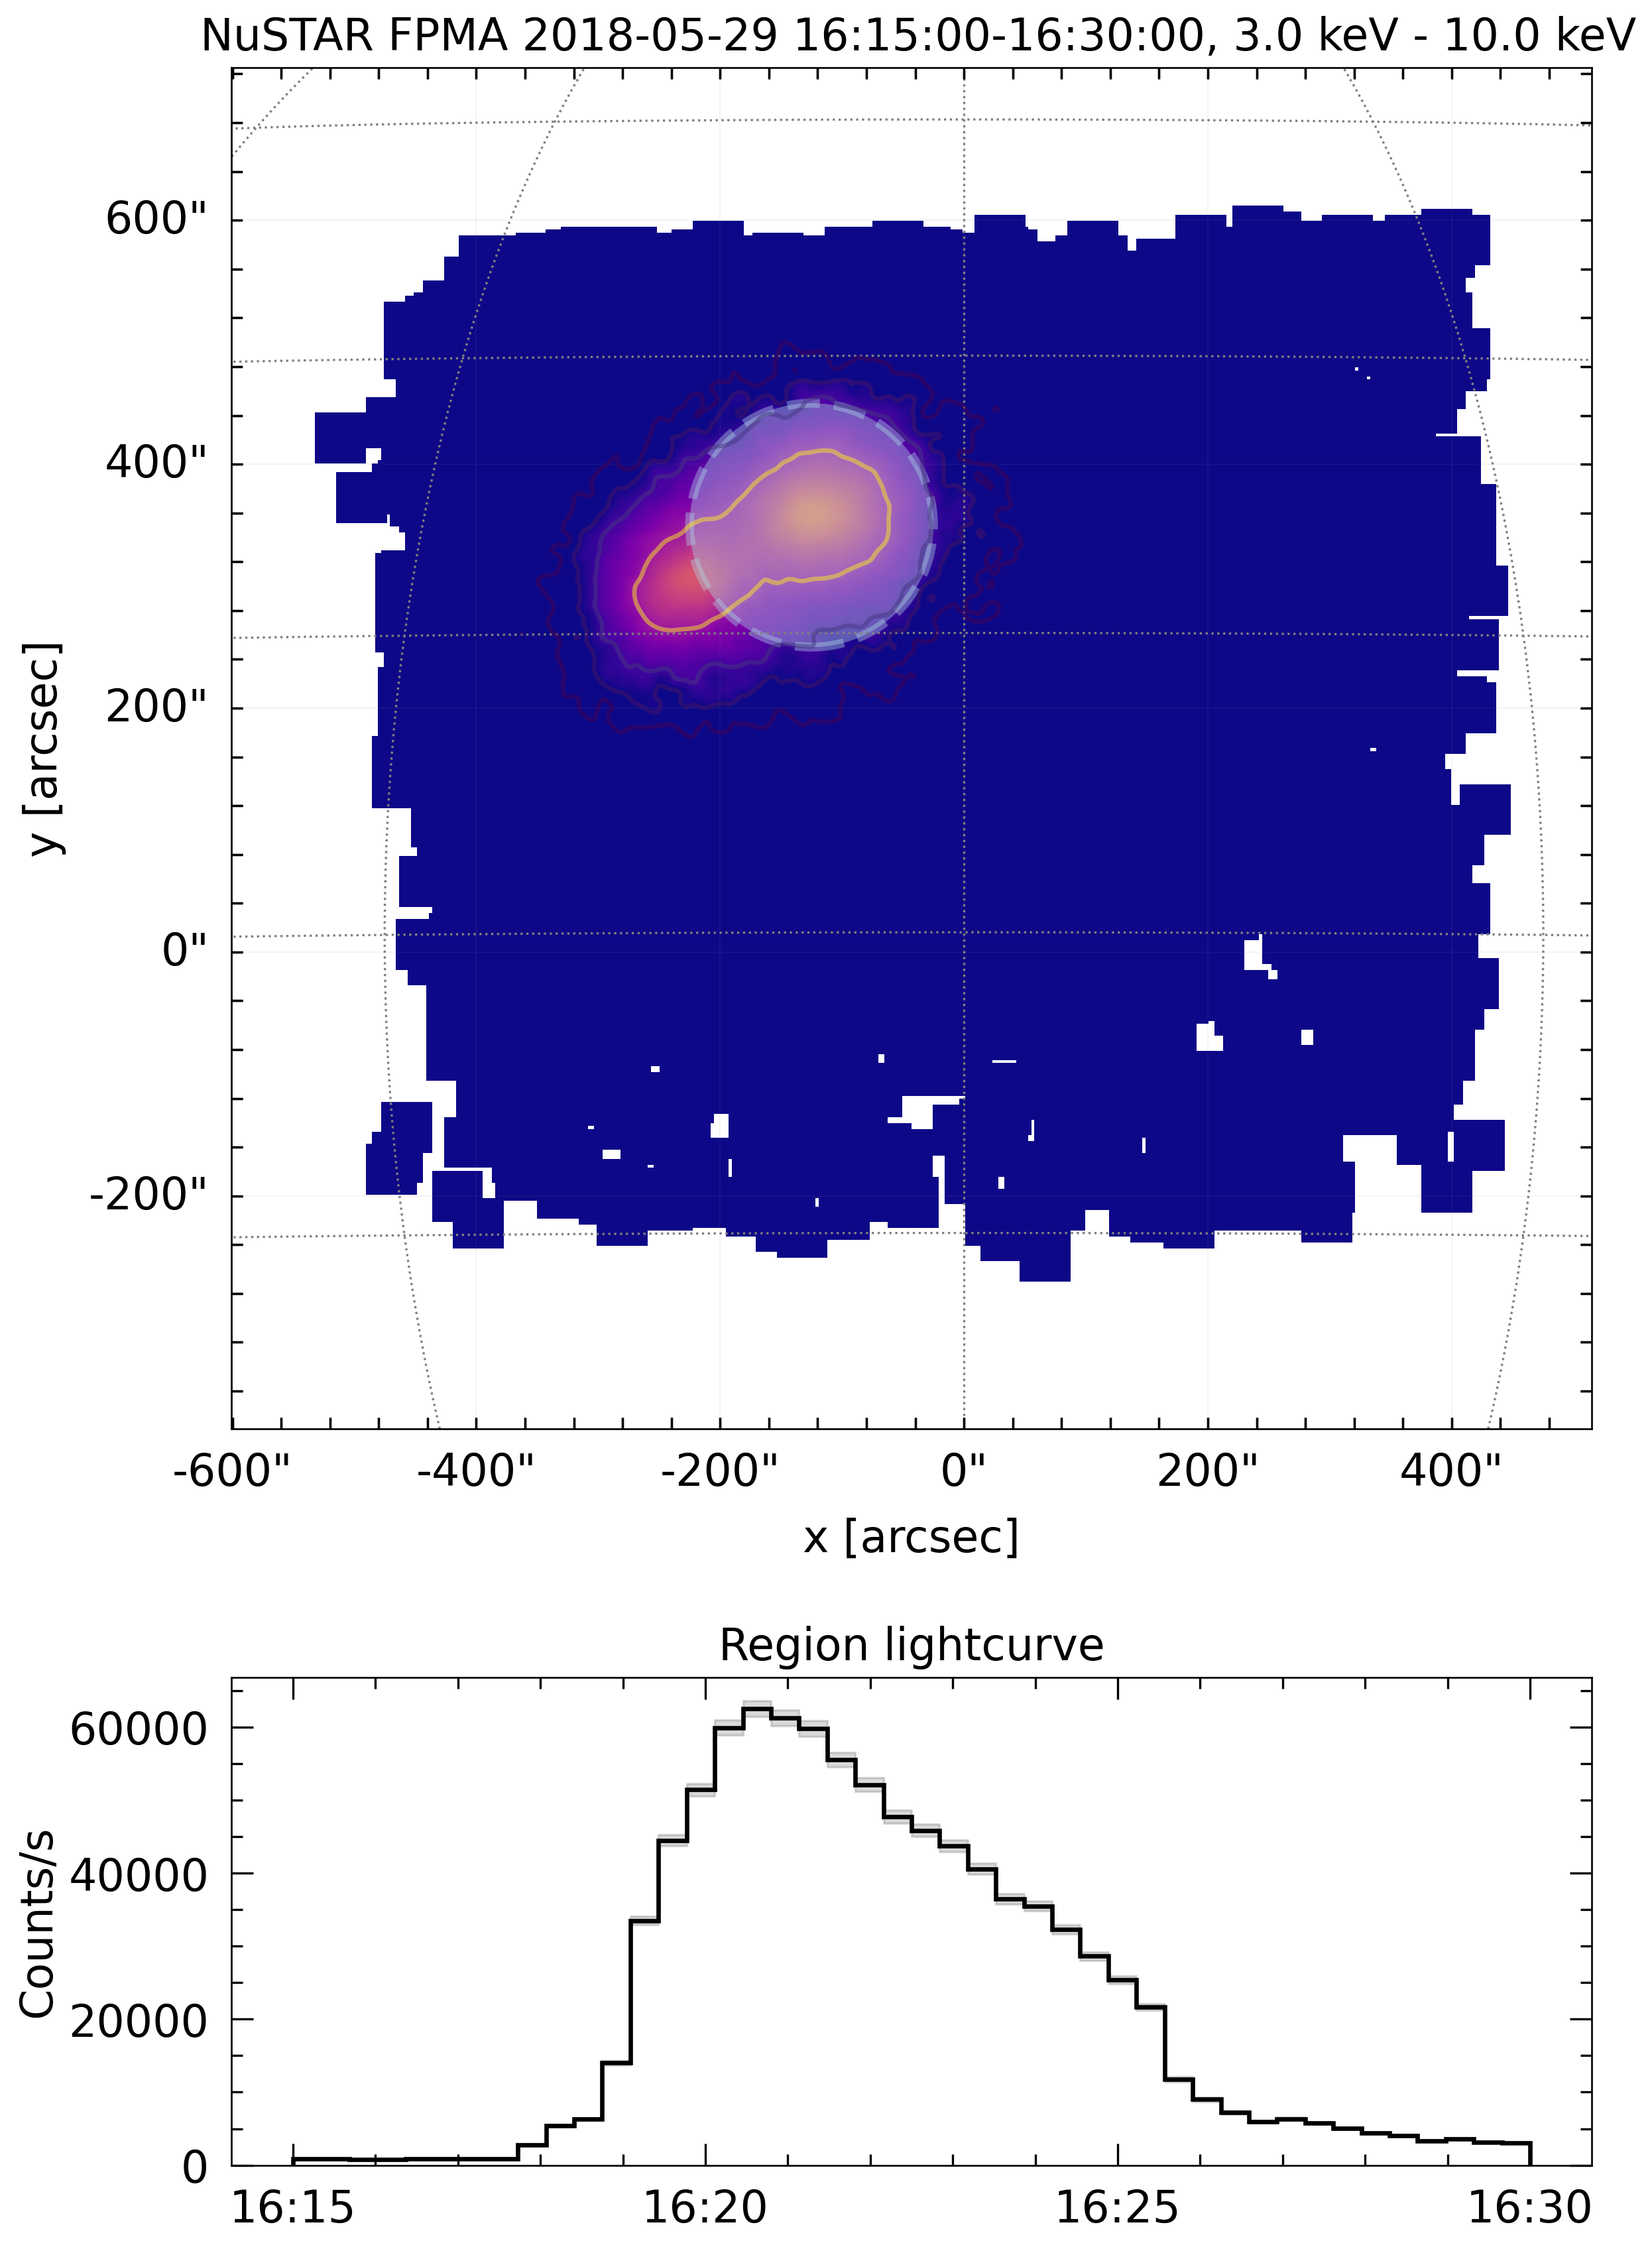

In [17]:
fig, ax_map, ax_lc = selector.plot_combined(20)

Specifying the `energy_ranges` parameter allows a stacked plot to be shown instead.

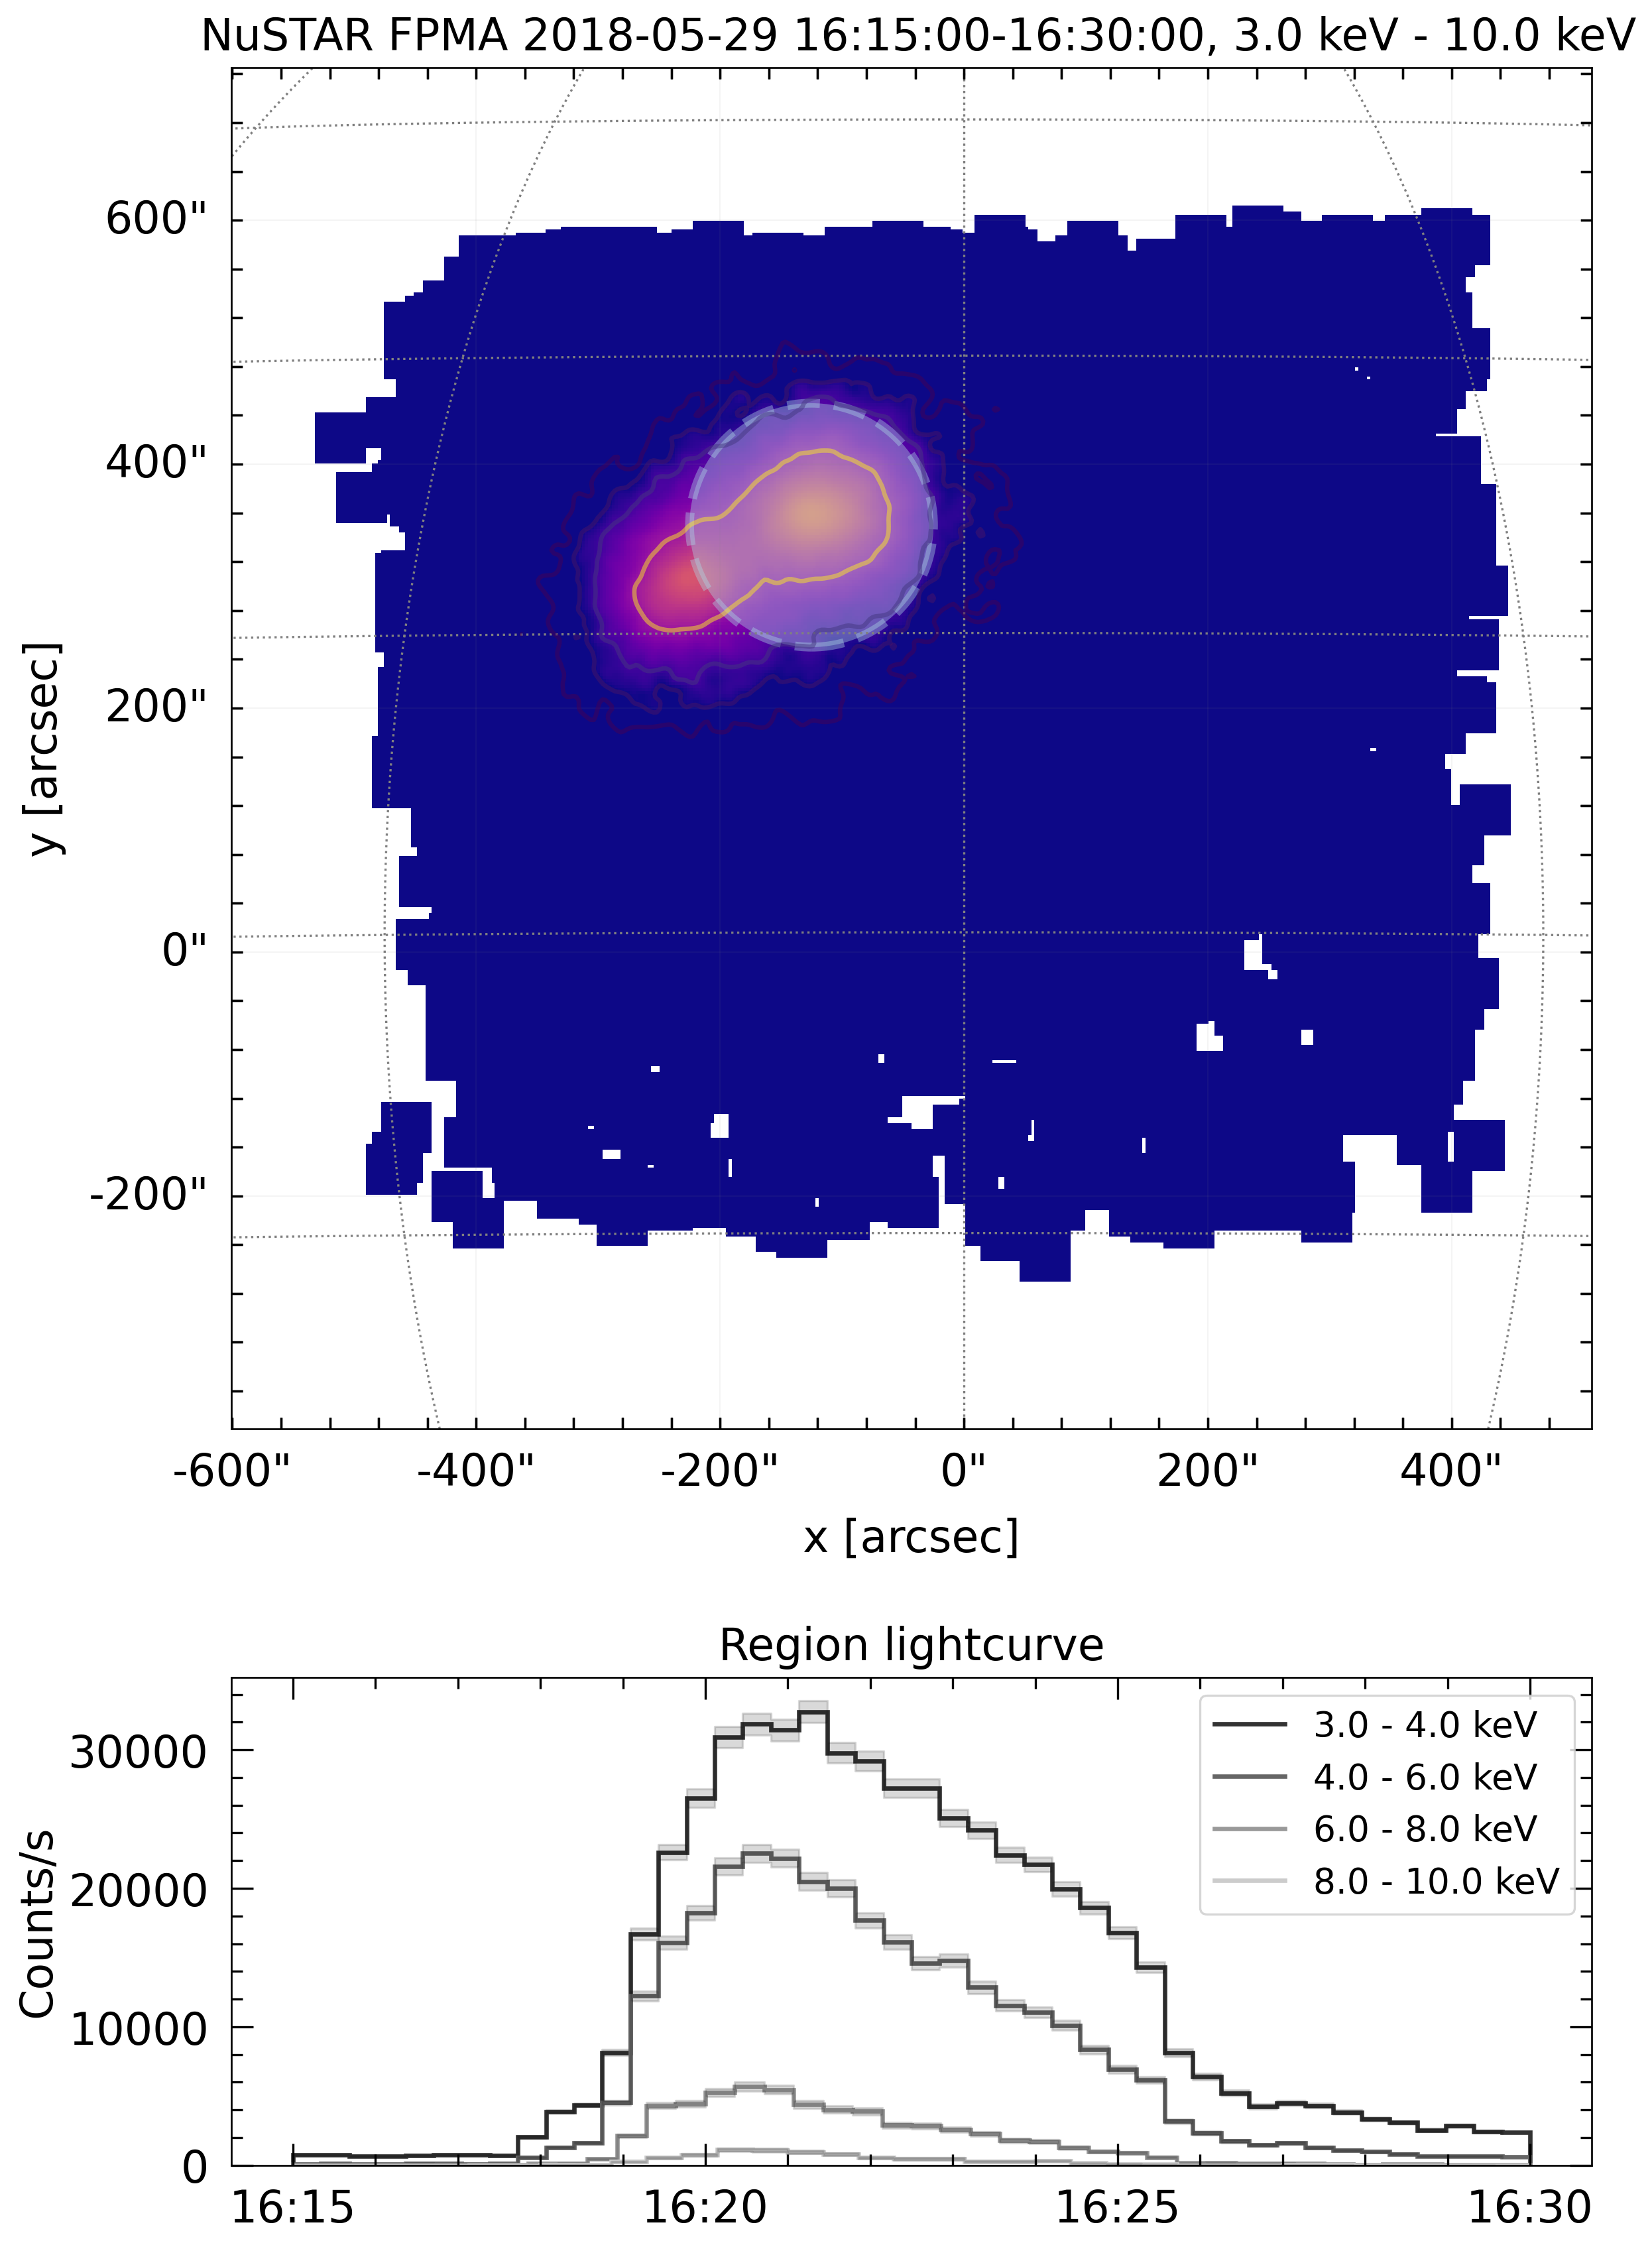

In [18]:
fig, ax_map, ax_lc = selector.plot_combined(
    frame_length = 20,
    energy_ranges = (
        (3, 4) * u.keV,
        (4, 6) * u.keV,
        (6, 8) * u.keV,
        (8, 10) * u.keV
    )
)

### Inset lightcurve

The lightcurve is inset on the map.
The user can specify the position by changing the `inset_pos` parameter.

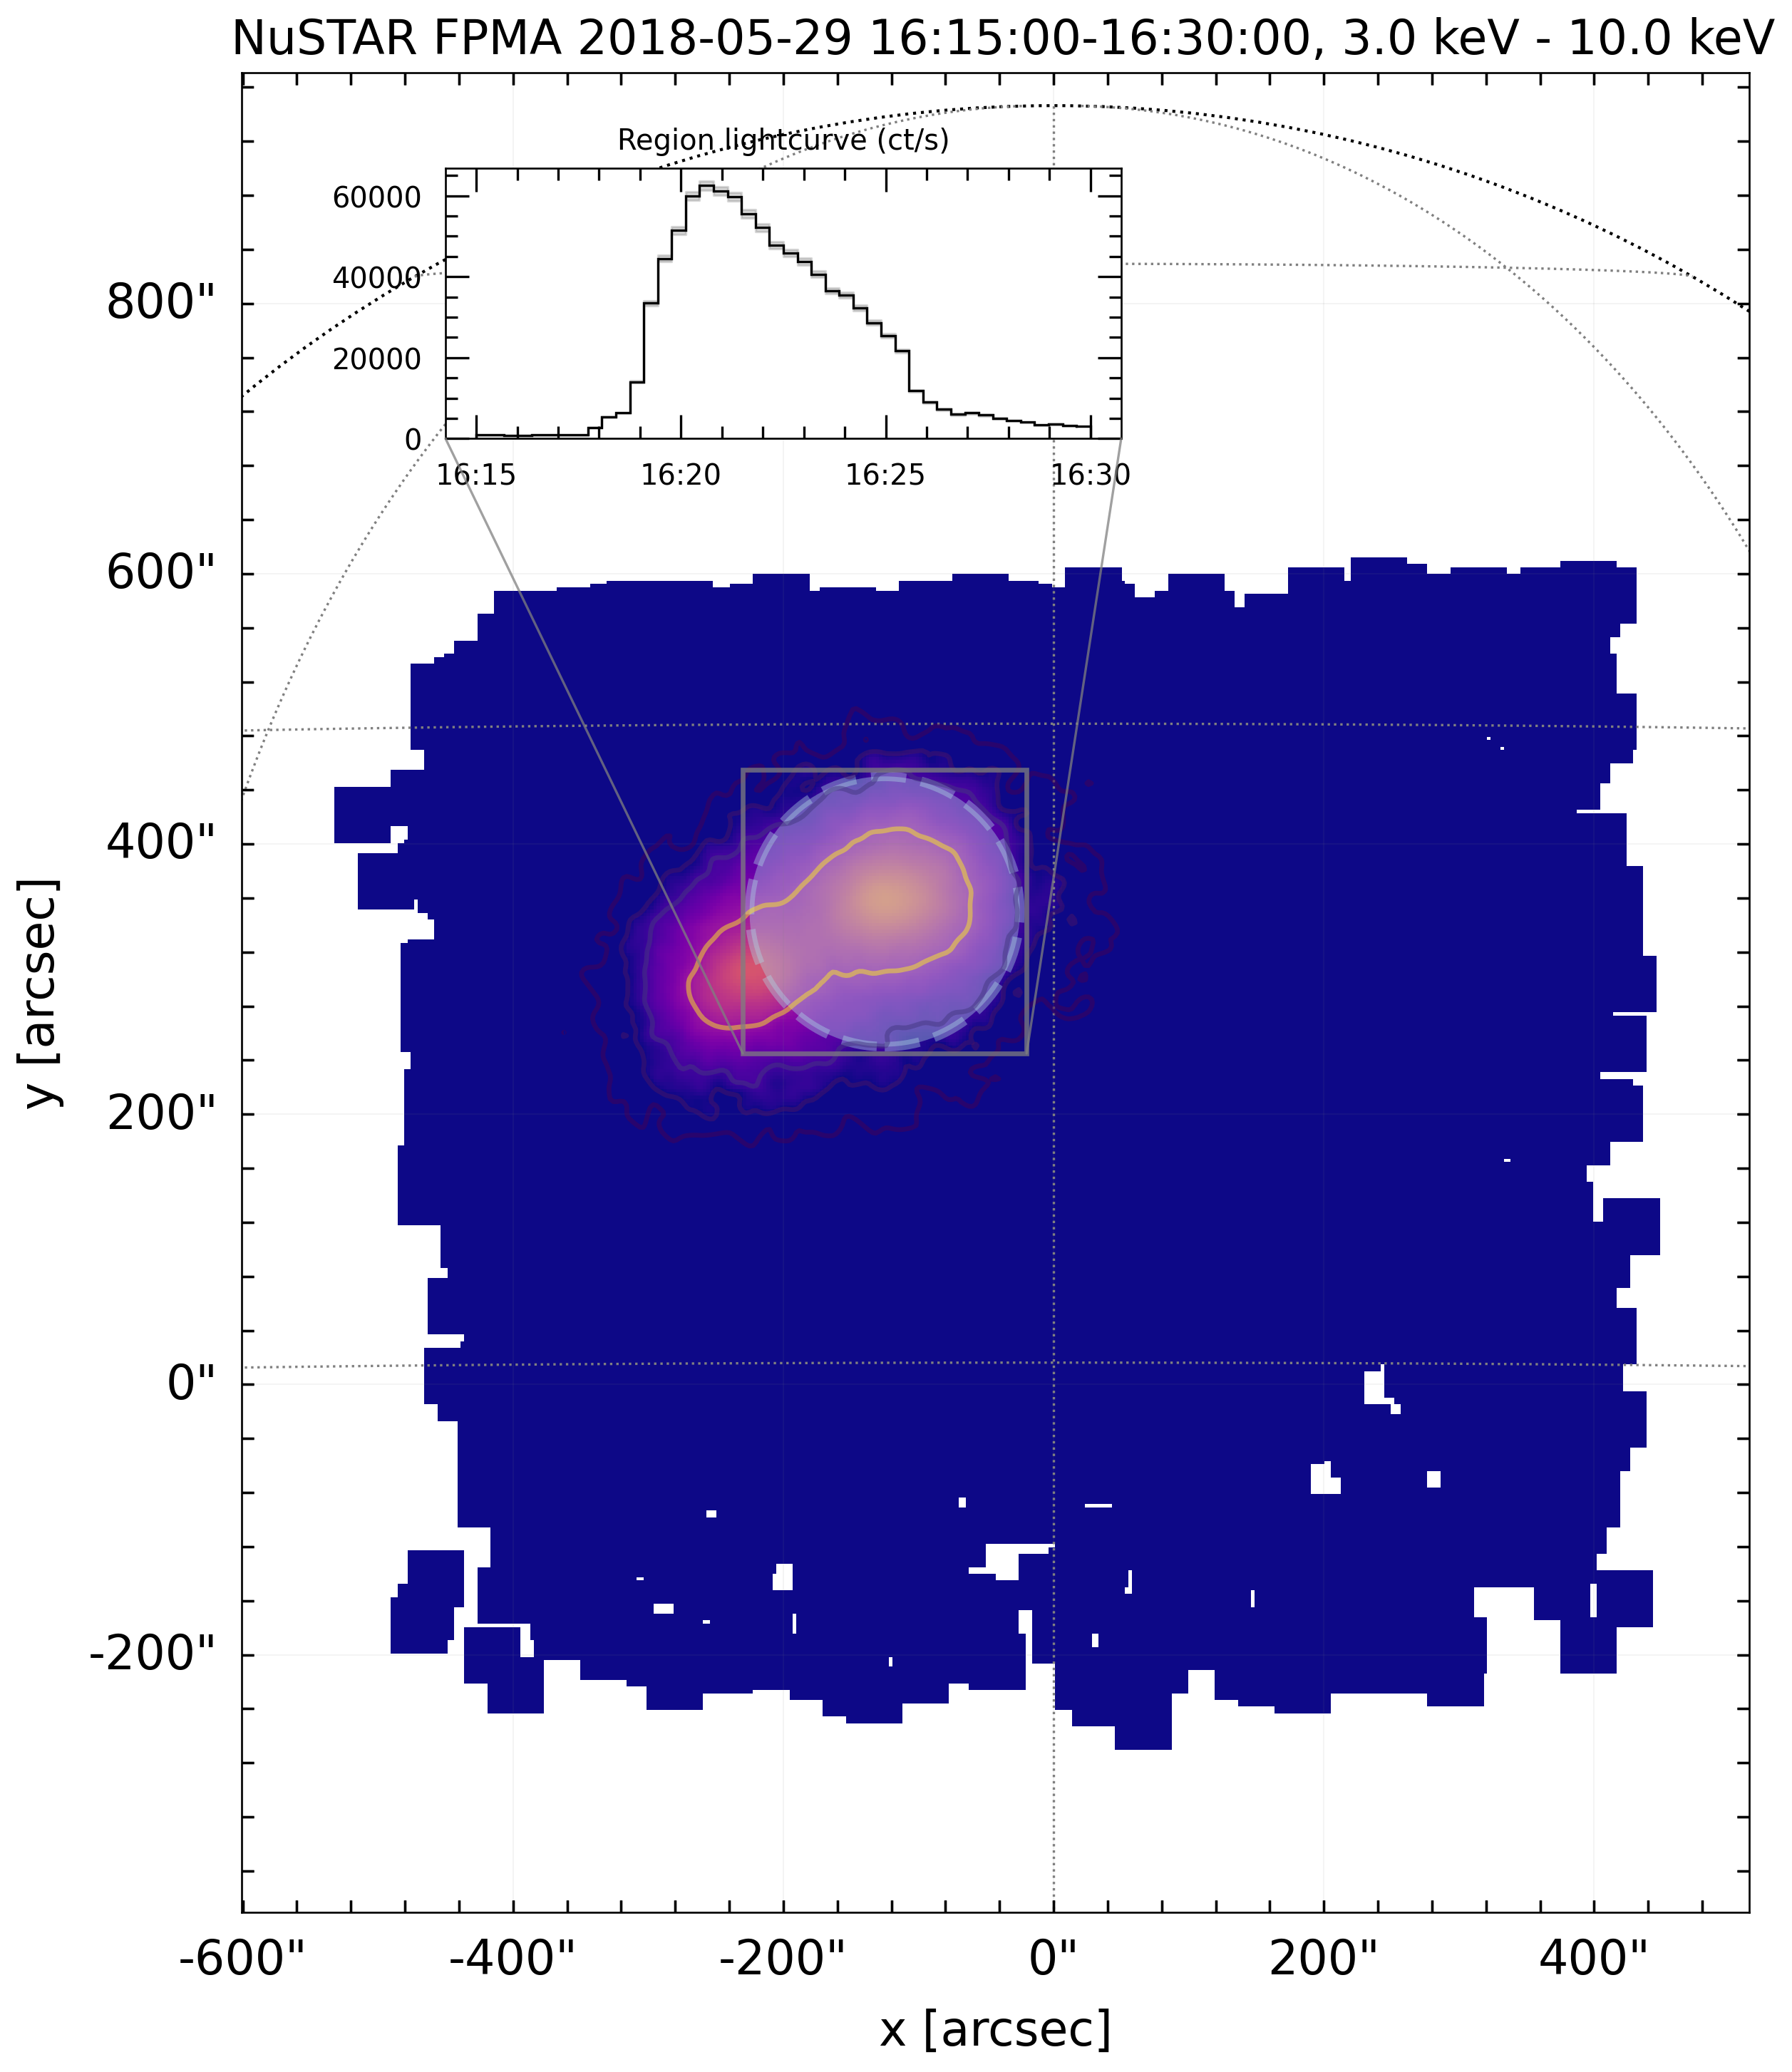

In [19]:
fig, ax, axins, submap = selector.plot_inset_lightcurve(
    frame_length = 20,
    inset_pos = (
        -450 * u.arcsec,
         700 * u.arcsec,
         500 * u.arcsec,
         200 * u.arcsec
    )
)
# selector.save_fig('inset')

Similar to the combined plot, one can specify the `energy_ranges` parameter to inset a stacked plot.

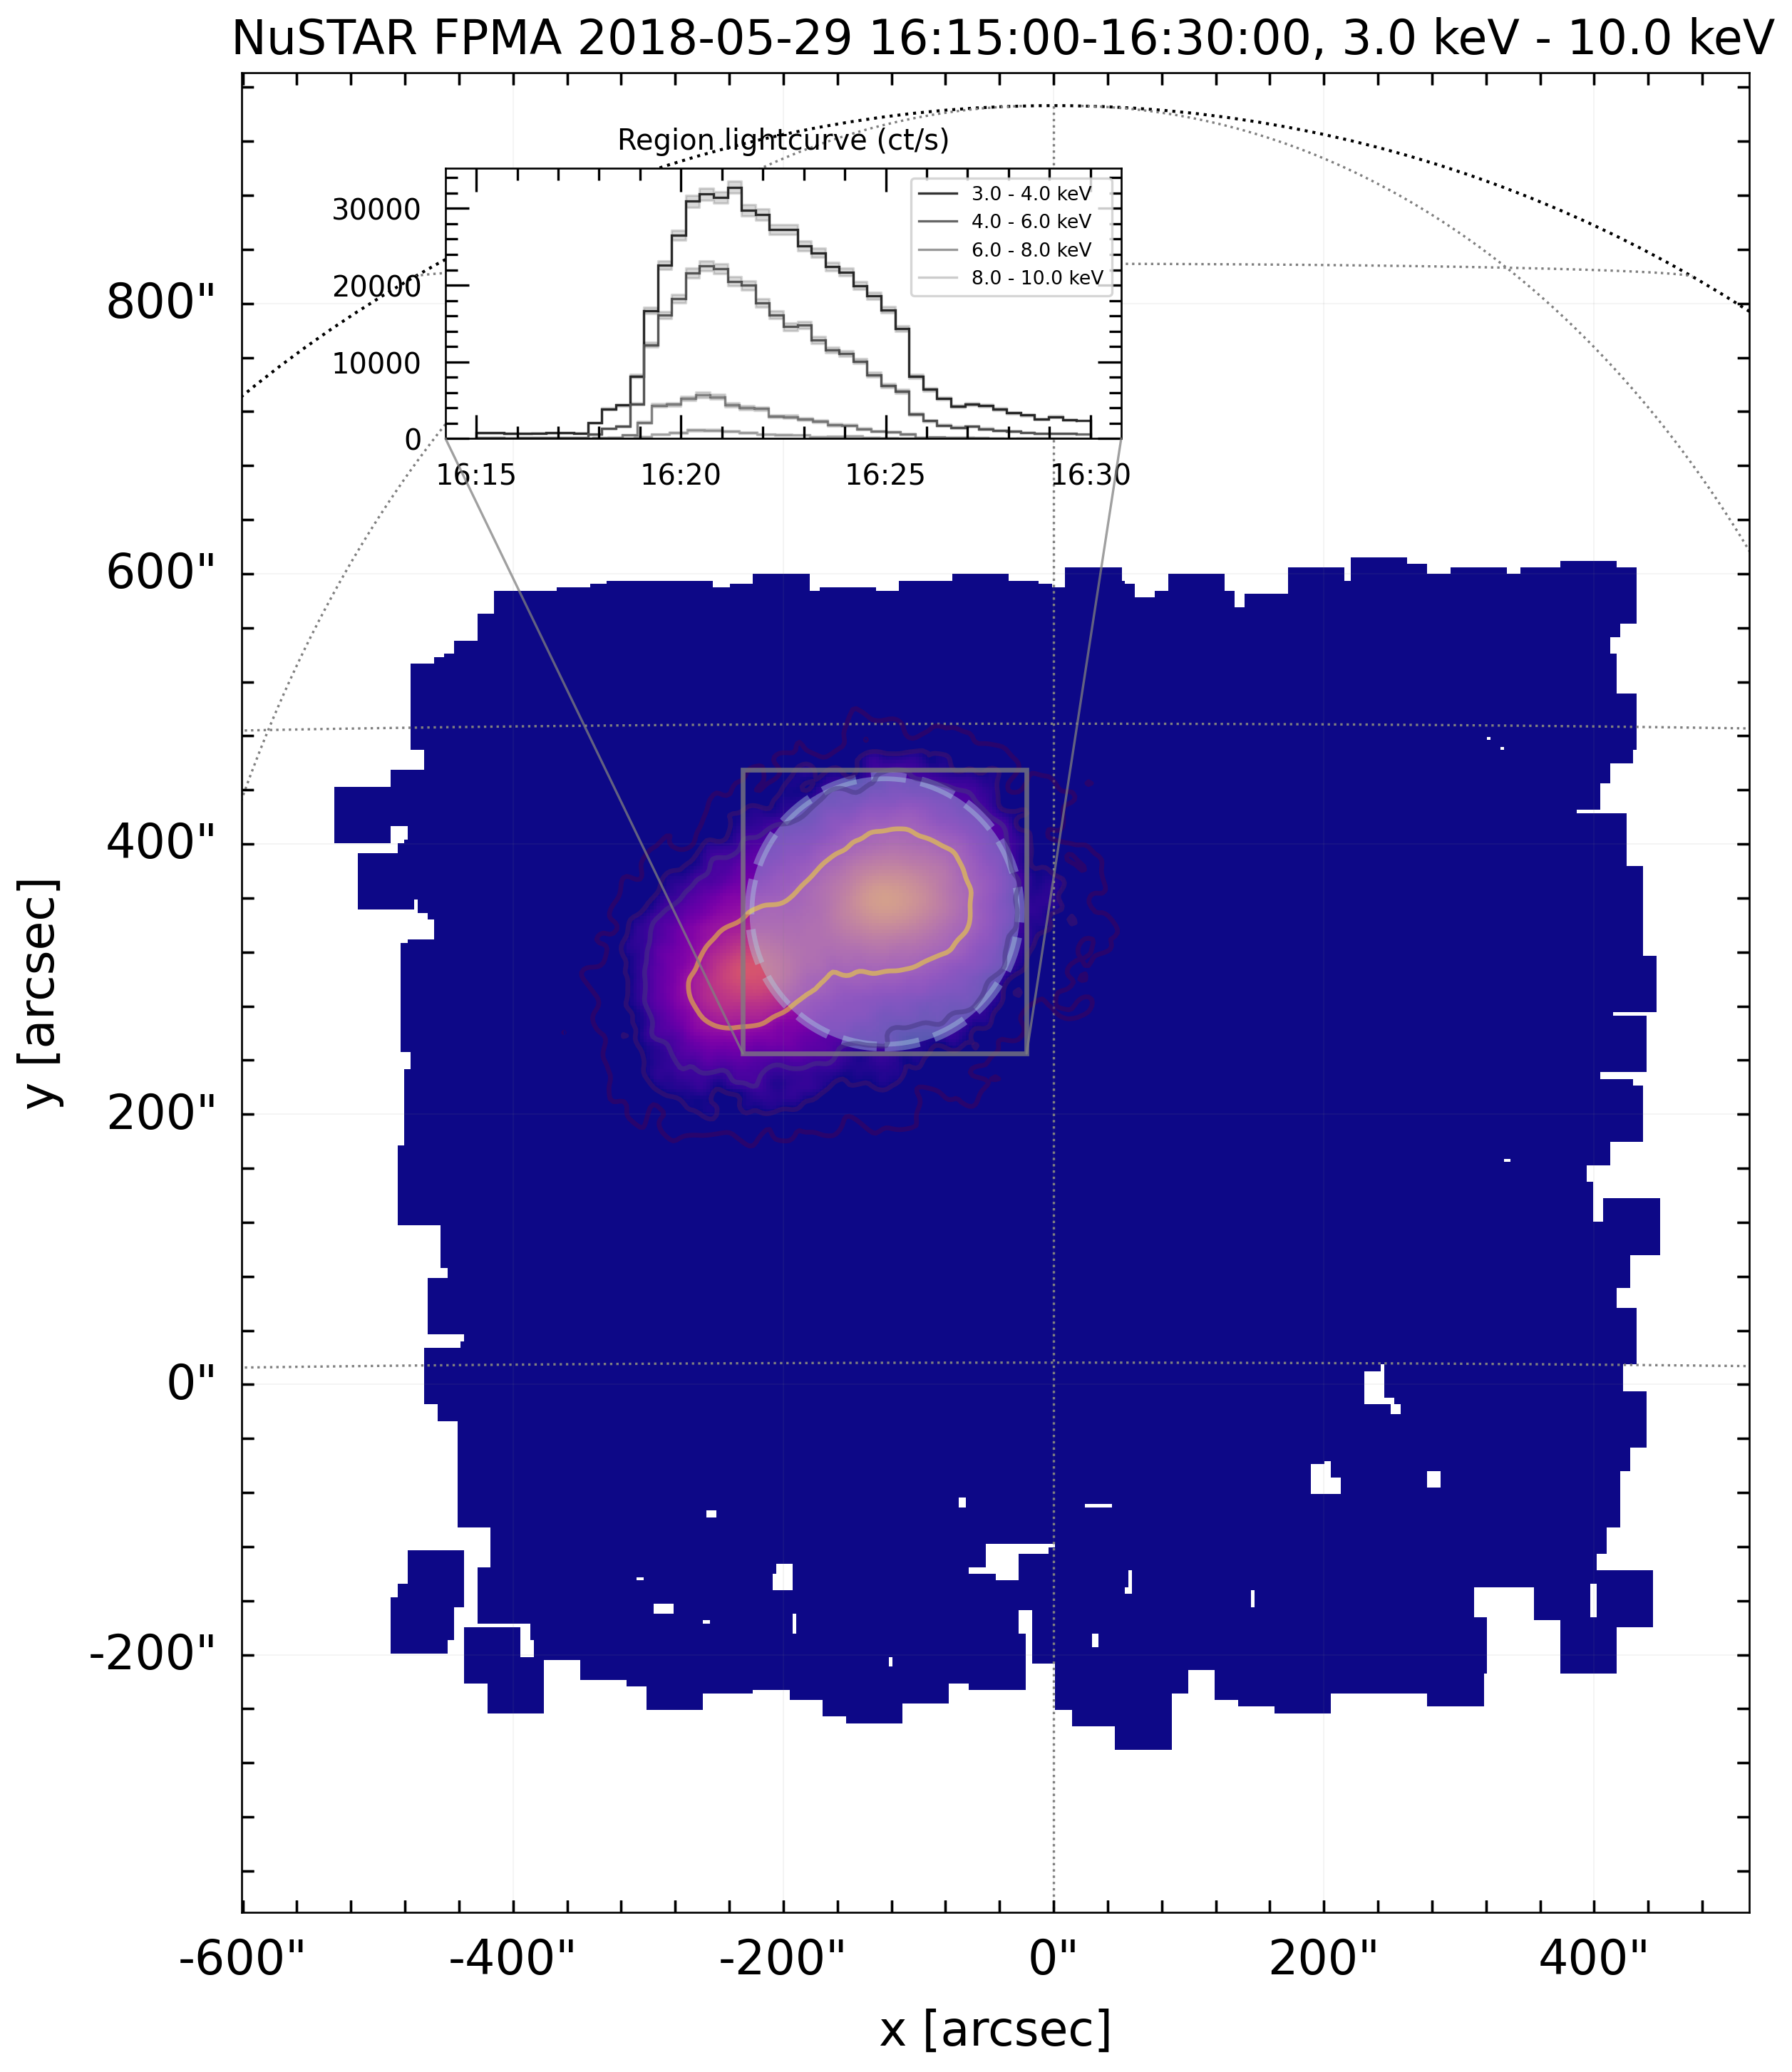

In [20]:
fig, ax, axins, submap = selector.plot_inset_lightcurve(
    frame_length = 20,
    energy_ranges = (
        (3, 4) * u.keV,
        (4, 6) * u.keV,
        (6, 8) * u.keV,
        (8, 10) * u.keV
    ),
    inset_pos = (
        -450 * u.arcsec,
         700 * u.arcsec,
         500 * u.arcsec,
         200 * u.arcsec
    )
)

## Save the lightcurve data to file

In [21]:
selector.save_lightcurve(20)